## ADABOOST
AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique that is used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights to incorrectly classified instances. Boosting is used to reduce bias as well as the variance for supervised learning. It works on the principle where learners are grown sequentially. Except for the first, each subsequent learner is grown from previously grown learners. In simple words, weak learners are converted into strong ones. Adaboost algorithm also works on the same principle as boosting, but there is a slight difference in working.

### How ADABOOST works?
Adaboost is a strong ml model which is built with multiple weak decision tree (stumps) model. The main stratergies behind the adaboost is that it creates multiple weak model and each new weak model improves the mistake of previous model to creat this it follows the following steps:

Suppose we have this dataset:
> 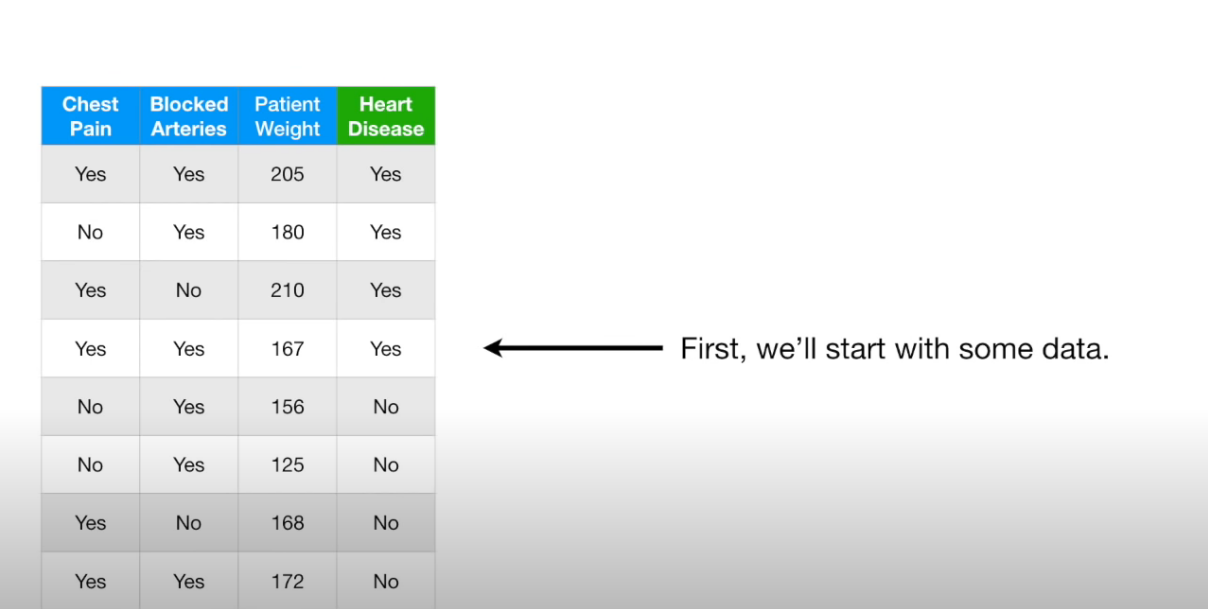

**Step 1:** First it will give each records a weight that indicates how important it is to be correctly classified. In the beginning it will give each records the equal weight, the weight which is assigned to each records is `1/n` where n is total number of records in our dataset.
> 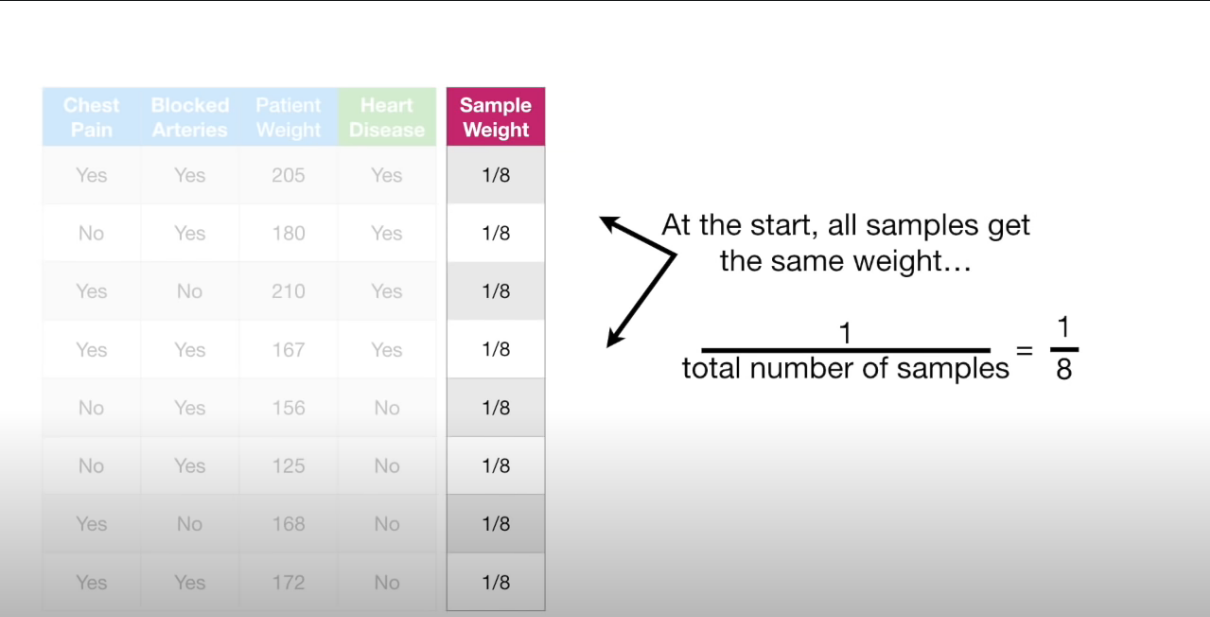

**Step 2:** Now it will analyzes best column which can classify the target variable better than other, it is identified by calculating impurity score of each column with either by `gini` or `entropy` values. So for that it will creates total `M` stumps, where `M` represents total number of column in a dataset except the target column.
> 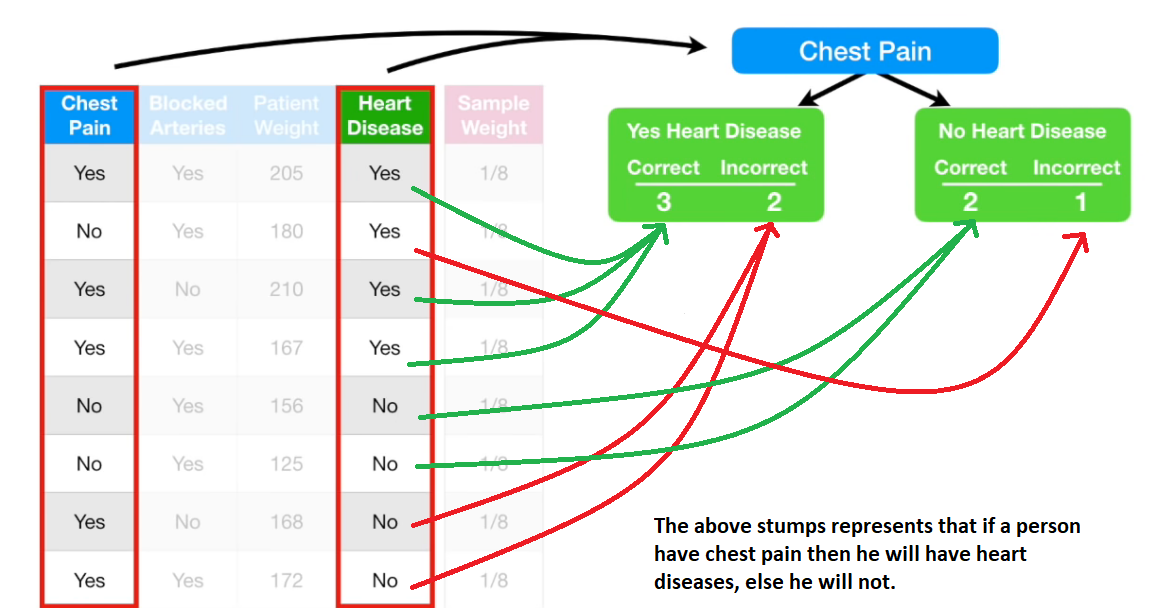 <br>
Similary we will create stump for all column, calcualte their Gini score and will select as first stump for the model which have least gini score<br>
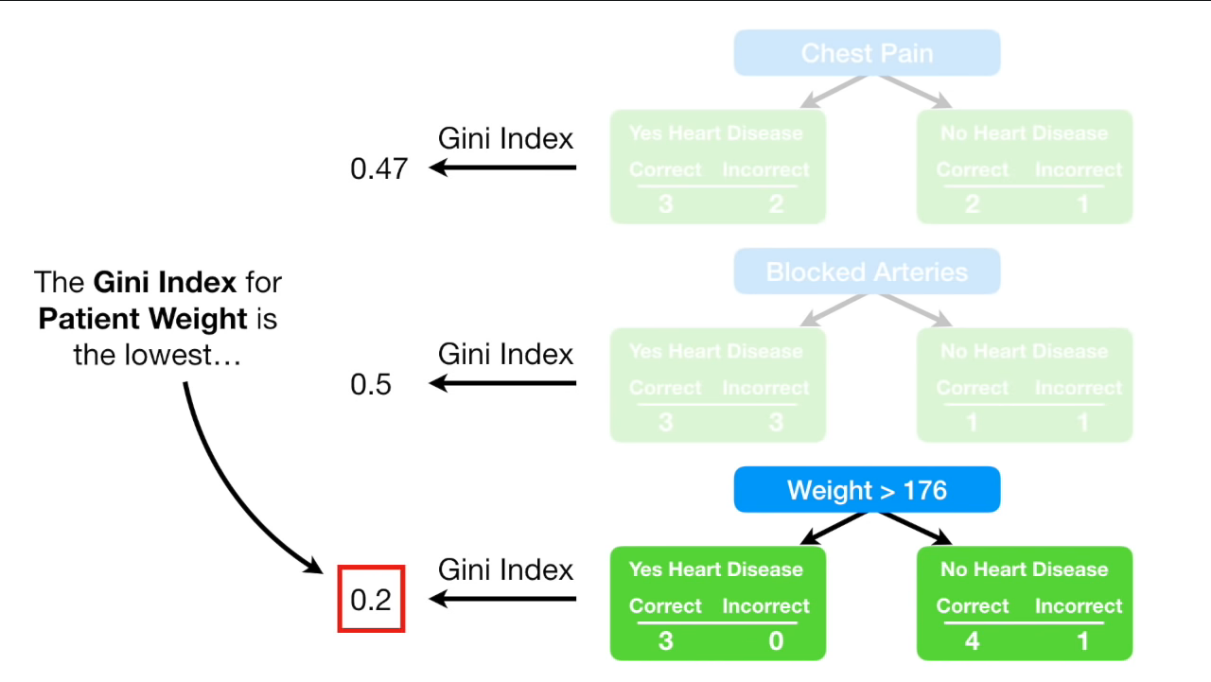

So in this case we will go with `Weight>176` as the first stump.

**Step 3:** Every stump get their `Amount of say`(Priority score) according to their performance, and while selecting the final output (output voting with all created stumps) we give more weightage to the output of model with high priority score. For example let say we have 5 model, and 3 classified certain feature as cat and those 3 model total priority score is 5 while on the other hand rest 2 model classified those feature as Dog and these two model total priority score is 6 then we will choose the final output as Dog.

We calculate the priority score of a model by the following formula
> 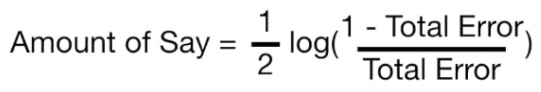

Where total error is the sum of weights of all missclassified records, the score of total error ranges from 0 to 1 where 0 represents perfect model with no error and 1 represents the terrible model with complete error. This stump have only one missclassified records so our priority score will be:
> 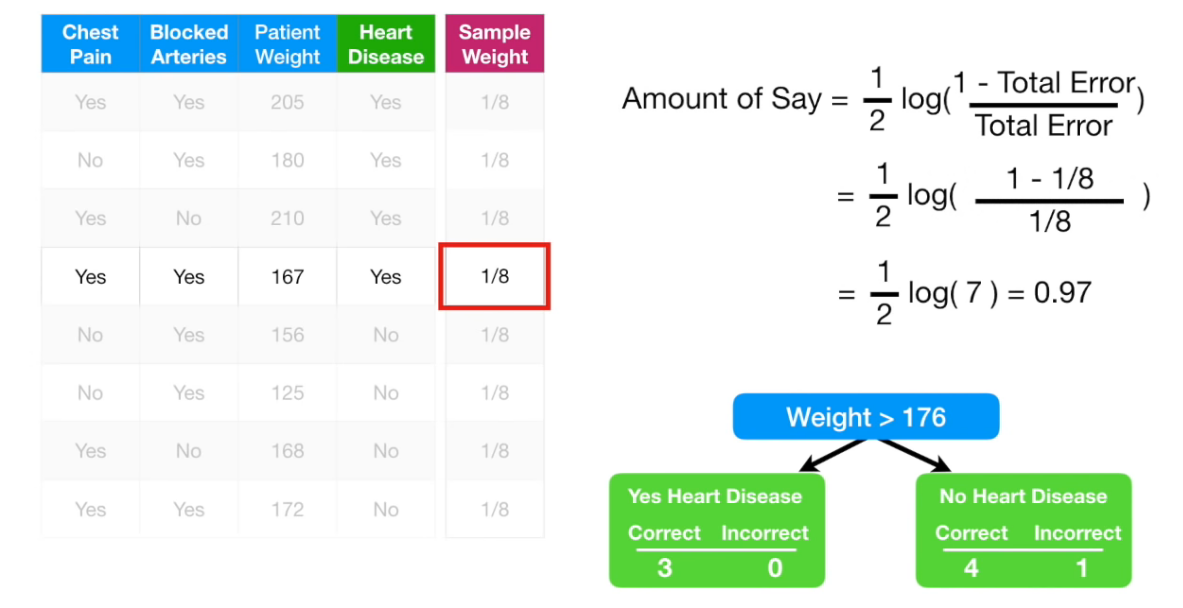

**Note:** We take log of e

**Step 4:** Now it will update the weight of all sample with the new weight. It will increase the weight of records which was misclassified will have higher weight to emphasize the importance of correctly classifying it, and it will decrease the weight for of the records. The new weight will be calculated with the following formula:
* For missclassified records: The higher the priority value, the higher the new weight
> 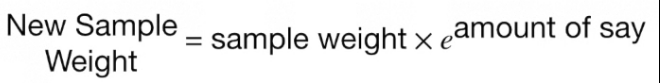<br>
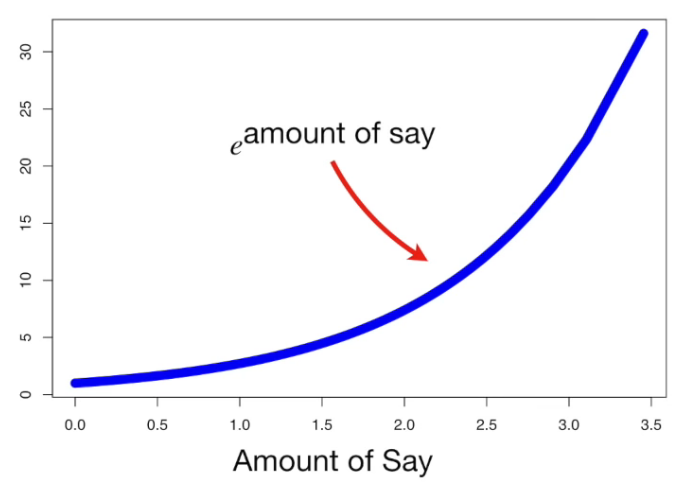
* For Correctly classified records: The higher the priority value, the higher the new weight
> 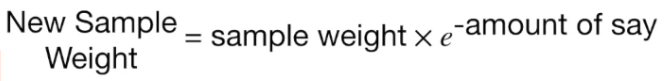<br>
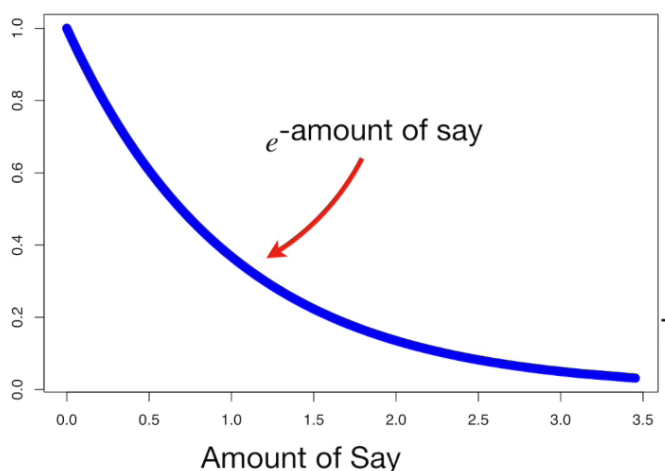

So our new weight for our all records will be
> 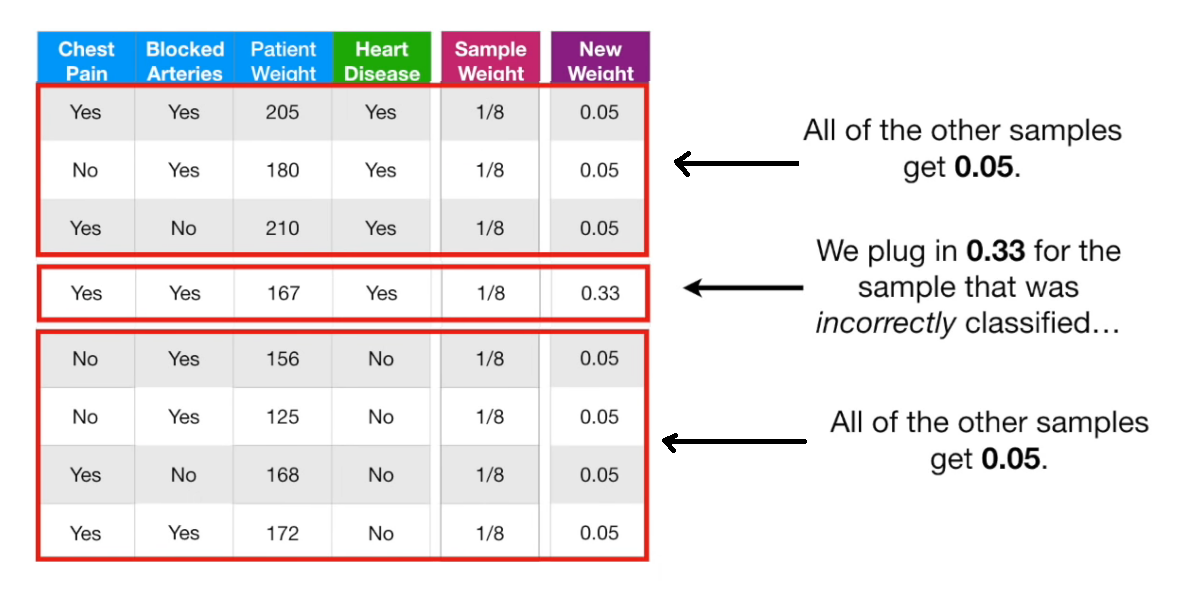

**Step 5:** Now it will need to normalize all sample's weight because if we will add all sample weight it will be 0.68. So to normalize it, it will divide each sample weight with 0.68 and then each sample weight will range from 0 to 1. This will be our new final sample weight.
> 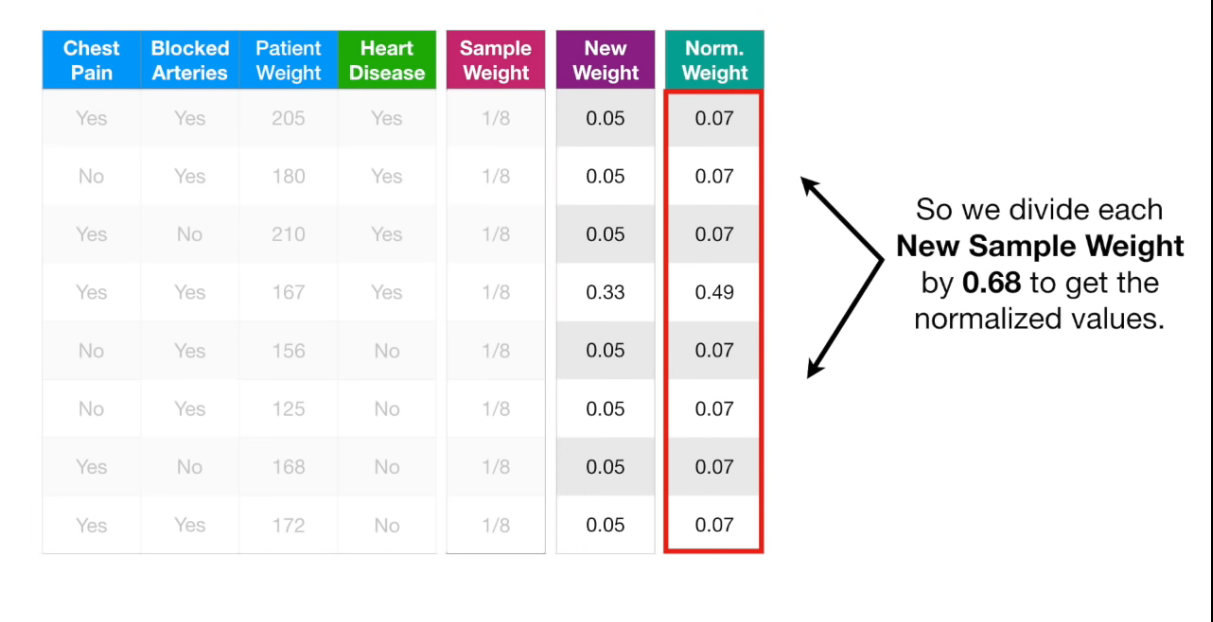

**Step 6:** After this it will generate new dataset from current dataset for creating new model. The new dataset will have same number of records and features as in the current dataset but will have many duplicate records, the records with the higest sample weight will duplicate more in new dataset. So that weighted gini index can put more ephasis on correctly classifying the records which was missclassfied by previous model. 

To do this it will create class interval for each records like this:
> 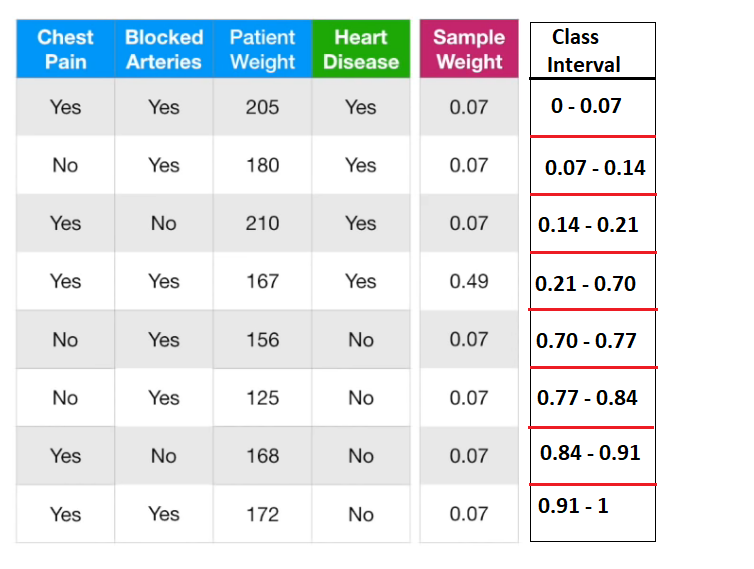<br>
Since our above calculation is not fully accurate we needed to round the last value to 1. 

After creating class interval for each records, the model will generate random values between 0 and 1 for n times where n is total number of records. And model will pick the records in which class interval the random number will fall, for eg if model generated 0.05 then 1 record will be selected, and if it generated 0.5 then 4th record will be selected, which was misclassified. 
> This way our new sample will something like this <br>
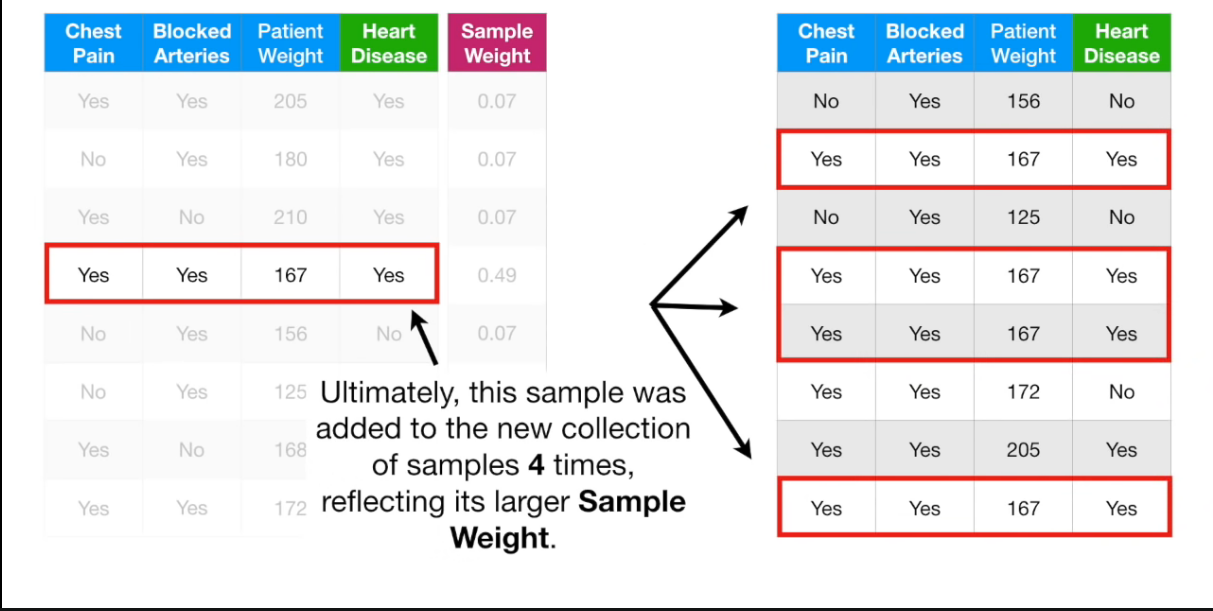<br>

**Step 7:** Now it will get rid of our old dataset and we will use new dataset. Now it will repeat the same steps [1, 2, 3, 4, 5, 6], i.e, it will create new sample weight and give each records the same weight agian, create new stump (model) with the least gini score, calculates it's priority value, update weight and generate new dataset and will again repeat the same steps for k maximum number of iteration (k is decided by the practisioner), if it get perfect fit before k iteration then it will stop early. 

**Step 8** Finally in the prediction stage, each model will be used but the model with higher priority score will get weightage for example:
> 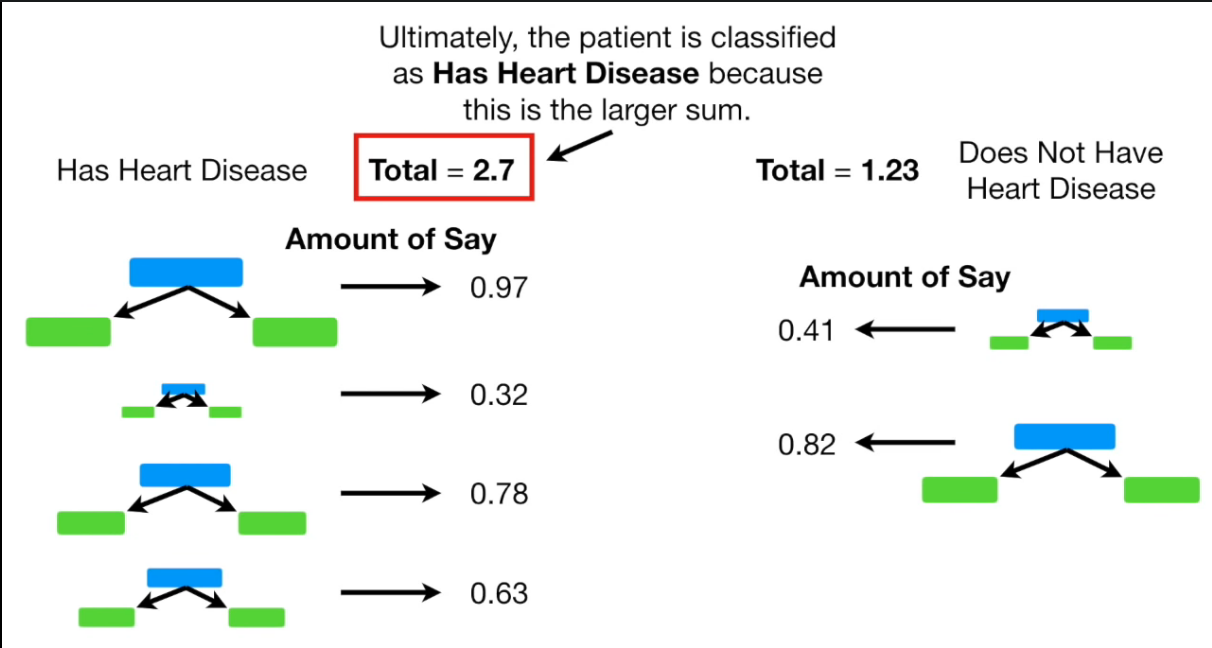

#### In Summary
> 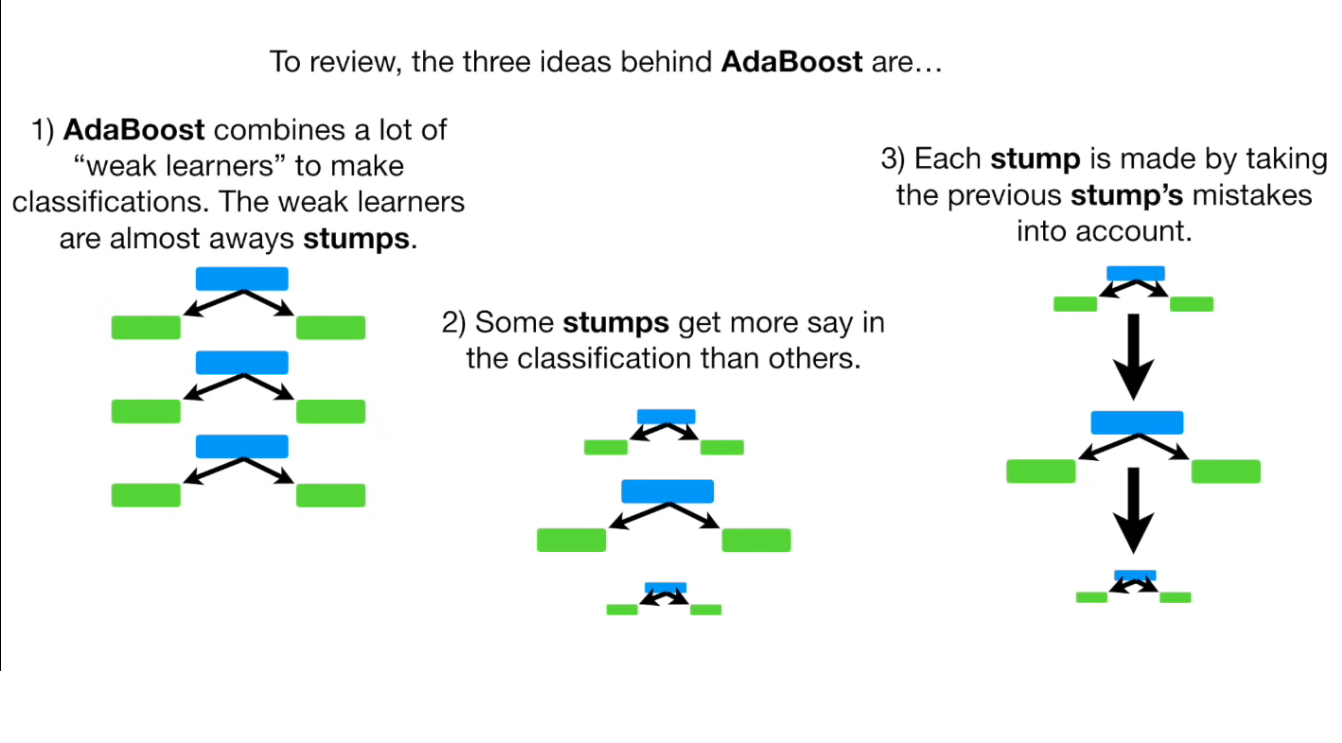

## Building Adaboost Classifier Model

In [1]:
import pandas as pd # <-- for handlind dataset
from sklearn.datasets import load_wine # <-- dataset we will be using 
from sklearn.ensemble import AdaBoostClassifier # <-- for building adaboost model
from sklearn.model_selection import train_test_split # <-- for splitting dataset 
from sklearn.metrics import classification_report, confusion_matrix # <-- for mode evaluation

In [2]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.sample(10, random_state=60)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
77,11.84,2.89,2.23,18.0,112.0,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
52,13.82,1.75,2.42,14.0,111.0,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190.0,0
15,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0,0
129,12.04,4.30,2.38,22.0,80.0,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580.0,1
45,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0,0
124,11.87,4.31,2.39,21.0,82.0,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380.0,1
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0,1
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0,2
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [4]:
# separate features and columns
features = df.iloc[:, :-1]
label = df.iloc[:, -1]

print(features.shape, label.shape)

(178, 13) (178,)


In [5]:
# split data for training and testing
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=91)
print(x_train.shape ,x_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


In [6]:
# lets build our Adaboost model
model = AdaBoostClassifier(n_estimators=50)
model.fit(x_train, y_train)

AdaBoostClassifier()

In [7]:
# let's test this model on our testing data
y_pred = model.predict(x_test)
print(y_pred)
print(y_test.values)

[2 1 1 1 1 0 0 2 1 1 1 0 0 1 0 1 1 0 0 0 1 1 2 2 2 1 2 0 1 1 1 2 1 1 2 1]
[2 1 1 1 1 0 0 2 1 0 1 0 0 1 0 1 1 0 0 0 1 1 2 2 2 1 2 0 1 1 1 2 1 1 2 1]


In [8]:
# let's see it's performance
print('Confussion matrix\n', confusion_matrix(y_test, y_pred))
print('-'*20)
print("Model Accuracy Train\n", model.score(x_train, y_train), "\nModel Accuracy Test\n", model.score(x_test, y_test))
print('-'*20)
print('Classification Report', classification_report(y_test, y_pred))

Confussion matrix
 [[ 9  1  0]
 [ 0 18  0]
 [ 0  0  8]]
--------------------
Model Accuracy Train
 0.9647887323943662 
Model Accuracy Test
 0.9722222222222222
--------------------
Classification Report               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



This model is making only one mistake. Anyway our model is generalized and have preety good accuracy score.